# Basic Exploratory Data Analysis for Ergast race data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

In [2]:
# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
plt.style.use('seaborn-v0_8-dark-palette')
%matplotlib inline

# Import data
from db.repositiries.data_repository import F1DataRepository


In [3]:
df = F1DataRepository.get_all_race_history()
# print(plt.style.available)
# print(sns.axes_style())
df

2025-04-18 17:13:56,835 - db.repositiries.data_repository - DEBUG - Fetching race history data
2025-04-18 17:13:56,979 - security.vault - DEBUG - Successfully authenticated with Vault
2025-04-18 17:13:56,980 - security.vault - INFO - Vault client initialized successfully
2025-04-18 17:13:57,013 - db.connection_pool - INFO - Creating database engine for postgresql+psycopg2 at 10.0.20.18:5432/f1db
2025-04-18 17:13:57,054 - db.connection_pool - DEBUG - Database engine and session factory created successfully
2025-04-18 17:13:57,055 - db.repositiries.data_repository - DEBUG - Executing raw SQL to DataFrame: 
        SELECT 
            races.raceId AS raceId,
            races.circuitId AS circuitId,
            circuits.name AS circuitName,
            races.year AS raceYear,
            races.date AS raceDate,
            races.time AS raceTime,
            races.round AS roundNumber,
            races.url AS raceURL,
            constructors.constructorId AS constructorId,
            c

,raceid,circuitid,circuitname,raceyear,racedate,racetime,roundnumber,raceurl,constructorid,constructorname,driverid,drivercode,q1,q2,q3,qualifyingposition,startinggrid,finishpositionorder,finishpositiontext,status,milliseconds,points,fastestlap,fastestlaptime,fastestlapspeed,drivertotalpoints,driverrank,driverwins,constructortotalpoints,constructorrank,constructorwins
0,257,18,Autódromo José Carlos Pace,1994,1994-03-27,None,1,http://en.wikipedia.org/wiki/1994_Brazilian_Gr...,22,Benetton,30,MSC,1:16.290,None,None,2,2,1,1,Finished,5739200.0,10.0,NaN,None,None,10.0,1,1.0,10.0,1,1.0
1,257,18,Autódromo José Carlos Pace,1994,1994-03-27,None,1,http://en.wikipedia.org/wiki/1994_Brazilian_Gr...,3,Williams,71,None,1:17.554,None,None,4,4,2,2,+1 Lap,NaN,6.0,NaN,None,None,6.0,2,0.0,6.0,2,0.0
2,257,18,Autódromo José Carlos Pace,1994,1994-03-27,None,1,http://en.wikipedia.org/wiki/1994_Brazilian_Gr...,6,Ferrari,55,None,1:17.385,None,None,3,3,3,3,+1 Lap,NaN,4.0,NaN,None,None,4.0,3,0.0,4.0,3,0.0
3,257,18,Autódromo José Carlos Pace,1994,1994-03-27,None,1,http://en.wikipedia.org/wiki/1994_Brazilian_Gr...,17,Jordan,22,BAR,1:18.414,None,None,14,14,4,4,+1 Lap,NaN,3.0,NaN,None,None,3.0,4,0.0,3.0,4,0.0
4,257,18,Autódromo José Carlos Pace,1994,1994-03-27,None,1,http://en.wikipedia.org/wiki/1994_Brazilian_Gr...,25,Tyrrell,79,None,1:18.194,None,None,10,10,5,5,+2 Laps,NaN,2.0,NaN,None,None,2.0,5,0.0,2.0,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9570,1096,24,Yas Marina Circuit,2022,2022-11-20,13:00:00,22,http://en.wikipedia.org/wiki/2022_Abu_Dhabi_Gr...,210,Haas F1 Team,854,MSC,1:25.711,1:25.225,None,13,12,16,16,+1 Lap,NaN,0.0,39.0,1:29.833,211.632,12.0,16,0.0,37.0,8,0.0
9571,1096,24,Yas Marina Circuit,2022,2022-11-20,13:00:00,22,http://en.wikipedia.org/wiki/2022_Abu_Dhabi_Gr...,210,Haas F1 Team,825,MAG,1:25.834,None,None,16,16,17,17,+1 Lap,NaN,0.0,40.0,1:31.158,208.556,25.0,13,0.0,37.0,8,0.0
9572,1096,24,Yas Marina Circuit,2022,2022-11-20,13:00:00,22,http://en.wikipedia.org/wiki/2022_Abu_Dhabi_Gr...,131,Mercedes,1,HAM,1:25.594,1:24.774,1:24.508,5,5,18,18,Hydraulics,NaN,0.0,42.0,1:29.788,211.738,240.0,6,0.0,515.0,3,1.0
9573,1096,24,Yas Marina Circuit,2022,2022-11-20,13:00:00,22,http://en.wikipedia.org/wiki/2022_Abu_Dhabi_Gr...,3,Williams,849,LAT,1:26.054,None,None,20,20,19,19,Collision damage,NaN,0.0,45.0,1:30.309,210.517,2.0,20,0.0,8.0,10,0.0


## Initial Data Exploration

In [4]:
# Basic dataframe info
print("Data Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)

# First few rows
df.head()

Data Shape: (9575, 31)

Data Types:
raceid                      int64
circuitid                   int64
circuitname                object
raceyear                    int64
racedate                   object
racetime                   object
roundnumber                 int64
raceurl                    object
constructorid               int64
constructorname            object
driverid                    int64
drivercode                 object
q1                         object
q2                         object
q3                         object
qualifyingposition          int64
startinggrid                int64
finishpositionorder         int64
finishpositiontext         object
status                     object
milliseconds              float64
points                    float64
fastestlap                float64
fastestlaptime             object
fastestlapspeed            object
drivertotalpoints         float64
driverrank                 object
driverwins                float64
constructort

,raceid,circuitid,circuitname,raceyear,racedate,racetime,roundnumber,raceurl,constructorid,constructorname,driverid,drivercode,q1,q2,q3,qualifyingposition,startinggrid,finishpositionorder,finishpositiontext,status,milliseconds,points,fastestlap,fastestlaptime,fastestlapspeed,drivertotalpoints,driverrank,driverwins,constructortotalpoints,constructorrank,constructorwins
0,257,18,Autódromo José Carlos Pace,1994,1994-03-27,None,1,http://en.wikipedia.org/wiki/1994_Brazilian_Gr...,22,Benetton,30,MSC,1:16.290,None,None,2,2,1,1,Finished,5739200.0,10.0,NaN,None,None,10.0,1,1.0,10.0,1,1.0
1,257,18,Autódromo José Carlos Pace,1994,1994-03-27,None,1,http://en.wikipedia.org/wiki/1994_Brazilian_Gr...,3,Williams,71,None,1:17.554,None,None,4,4,2,2,+1 Lap,NaN,6.0,NaN,None,None,6.0,2,0.0,6.0,2,0.0
2,257,18,Autódromo José Carlos Pace,1994,1994-03-27,None,1,http://en.wikipedia.org/wiki/1994_Brazilian_Gr...,6,Ferrari,55,None,1:17.385,None,None,3,3,3,3,+1 Lap,NaN,4.0,NaN,None,None,4.0,3,0.0,4.0,3,0.0
3,257,18,Autódromo José Carlos Pace,1994,1994-03-27,None,1,http://en.wikipedia.org/wiki/1994_Brazilian_Gr...,17,Jordan,22,BAR,1:18.414,None,None,14,14,4,4,+1 Lap,NaN,3.0,NaN,None,None,3.0,4,0.0,3.0,4,0.0
4,257,18,Autódromo José Carlos Pace,1994,1994-03-27,None,1,http://en.wikipedia.org/wiki/1994_Brazilian_Gr...,25,Tyrrell,79,None,1:18.194,None,None,10,10,5,5,+2 Laps,NaN,2.0,NaN,None,None,2.0,5,0.0,2.0,5,0.0


In [5]:
# Basic statistics for numerical columns
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
raceid,9575.0,NaN,NaN,NaN,576.919582,418.409302,1.0,116.5,851.0,972.0,1096.0
circuitid,9575.0,NaN,NaN,NaN,18.564073,19.318152,1.0,6.0,13.0,21.0,79.0
circuitname,9575,42,Silverstone Circuit,557,NaN,NaN,NaN,NaN,NaN,NaN,NaN
raceyear,9575.0,NaN,NaN,NaN,2010.084178,8.062596,1994.0,2005.0,2011.0,2017.0,2022.0
racedate,9575,448,1994-05-01,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
racetime,7347,33,12:00:00,2409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
roundnumber,9575.0,NaN,NaN,NaN,9.663394,5.608922,1.0,5.0,9.0,14.0,22.0
raceurl,9575,448,http://en.wikipedia.org/wiki/1994_San_Marino_G...,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
constructorid,9575.0,NaN,NaN,NaN,43.515509,69.892314,1.0,4.0,9.0,25.0,214.0
constructorname,9575,46,Ferrari,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Count of null values per column
null_counts = df.isnull().sum().sort_values(ascending=False)
null_percent = (df.isnull().mean() * 100).sort_values(ascending=False)
pd.concat([null_counts, null_percent], axis=1, keys=['Count', 'Percent'])

,Count,Percent
q3,6095,63.655352
milliseconds,5453,56.950392
q2,4260,44.490862
racetime,2228,23.268930
fastestlaptime,2217,23.154047
fastestlap,2217,23.154047
fastestlapspeed,2217,23.154047
drivercode,1326,13.848564
driverwins,241,2.516971
drivertotalpoints,241,2.516971


## Data Cleaning

In [7]:
# Handle null values - we'll fill some with appropriate values and drop others
# For timing columns, we'll fill with 0 (assuming no time recorded means DNF/DNS)
timing_cols = ['q1', 'q2', 'q3', 'milliseconds', 'fastestlaptime', 'fastestlapspeed', 'racetime']
df[timing_cols] = df[timing_cols].fillna(0)

# For position columns, we'll fill with a high number (assuming null means didn't finish)
position_cols = ['qualifyingposition', 'startinggrid', 'finishpositionorder']
df[position_cols] = df[position_cols].fillna(100)

# For points columns, fill with 0
points_cols = ['points', 'drivertotalpoints', 'driverwins', 'constructortotalpoints', 'constructorwins', 'fastestlap']
df[points_cols] = df[points_cols].fillna(0)

# For categorical columns, fill with 'Unknown'
cat_cols = ['status', 'driverrank', 'constructorrank']
df[cat_cols] = df[cat_cols].fillna('Unknown')
df['drivercode'] = df['drivercode'].fillna('_UNK')

# Verify null handling
print("Remaining null values:", df.isnull().sum().sum())

Remaining null values: 0


## Basic Visualizations

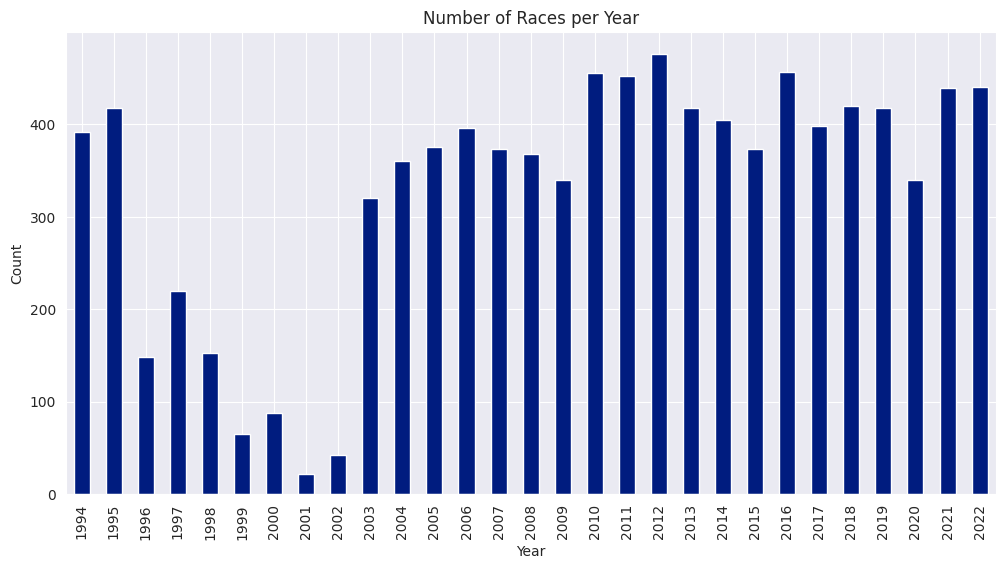

In [8]:
# Distribution of races by year
plt.figure(figsize=(12, 6))
df['raceyear'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Races per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

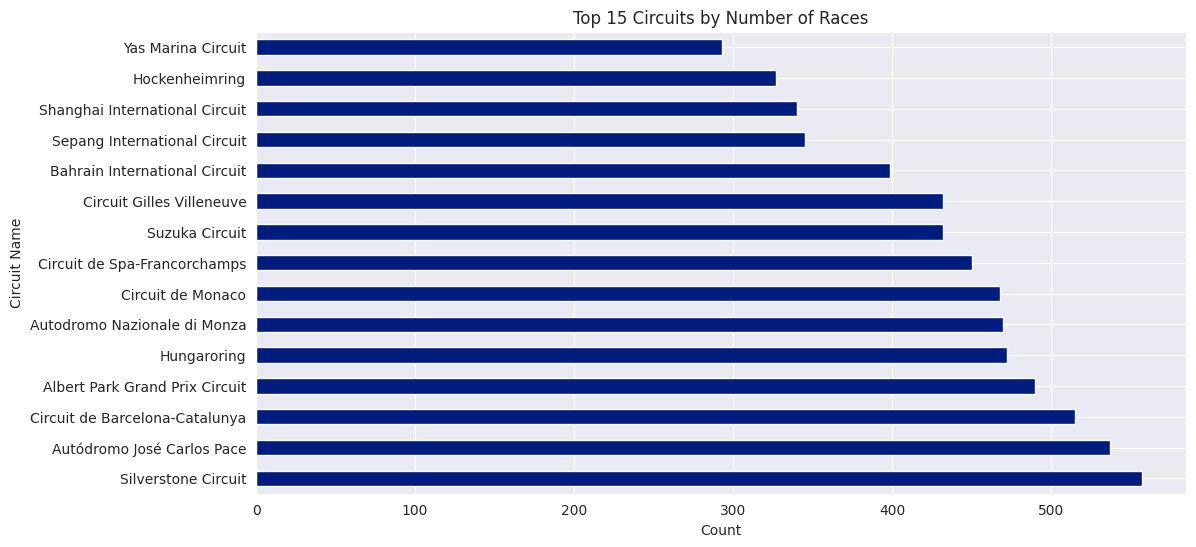

In [9]:
# Top circuits by number of races
plt.figure(figsize=(12, 6))
df['circuitname'].value_counts().head(15).plot(kind='barh')
plt.title('Top 15 Circuits by Number of Races')
plt.xlabel('Count')
plt.ylabel('Circuit Name')
plt.show()

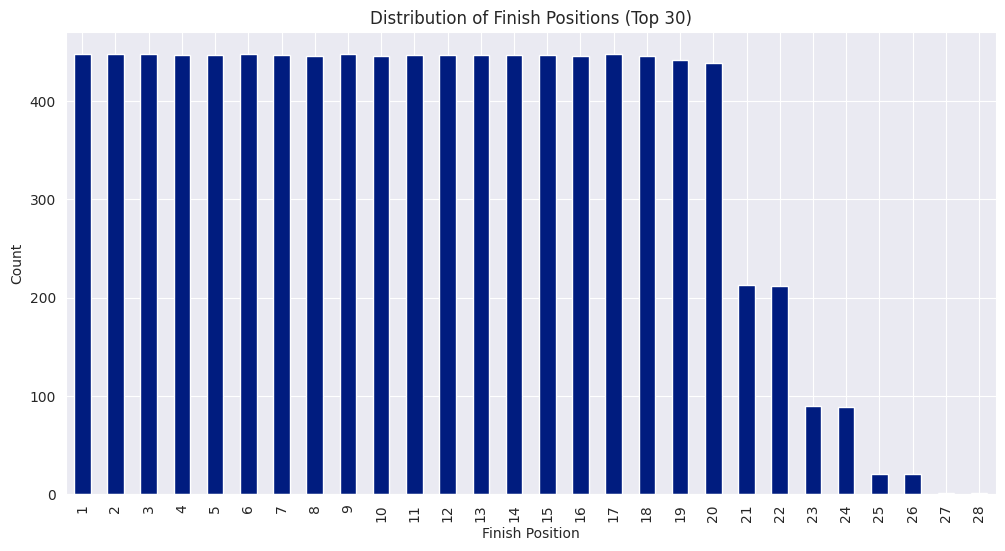

In [10]:
# Distribution of finish positions
plt.figure(figsize=(12, 6))
df['finishpositionorder'].value_counts().sort_index().head(30).plot(kind='bar')
plt.title('Distribution of Finish Positions (Top 30)')
plt.xlabel('Finish Position')
plt.ylabel('Count')
plt.show()

## Correlation Analysis

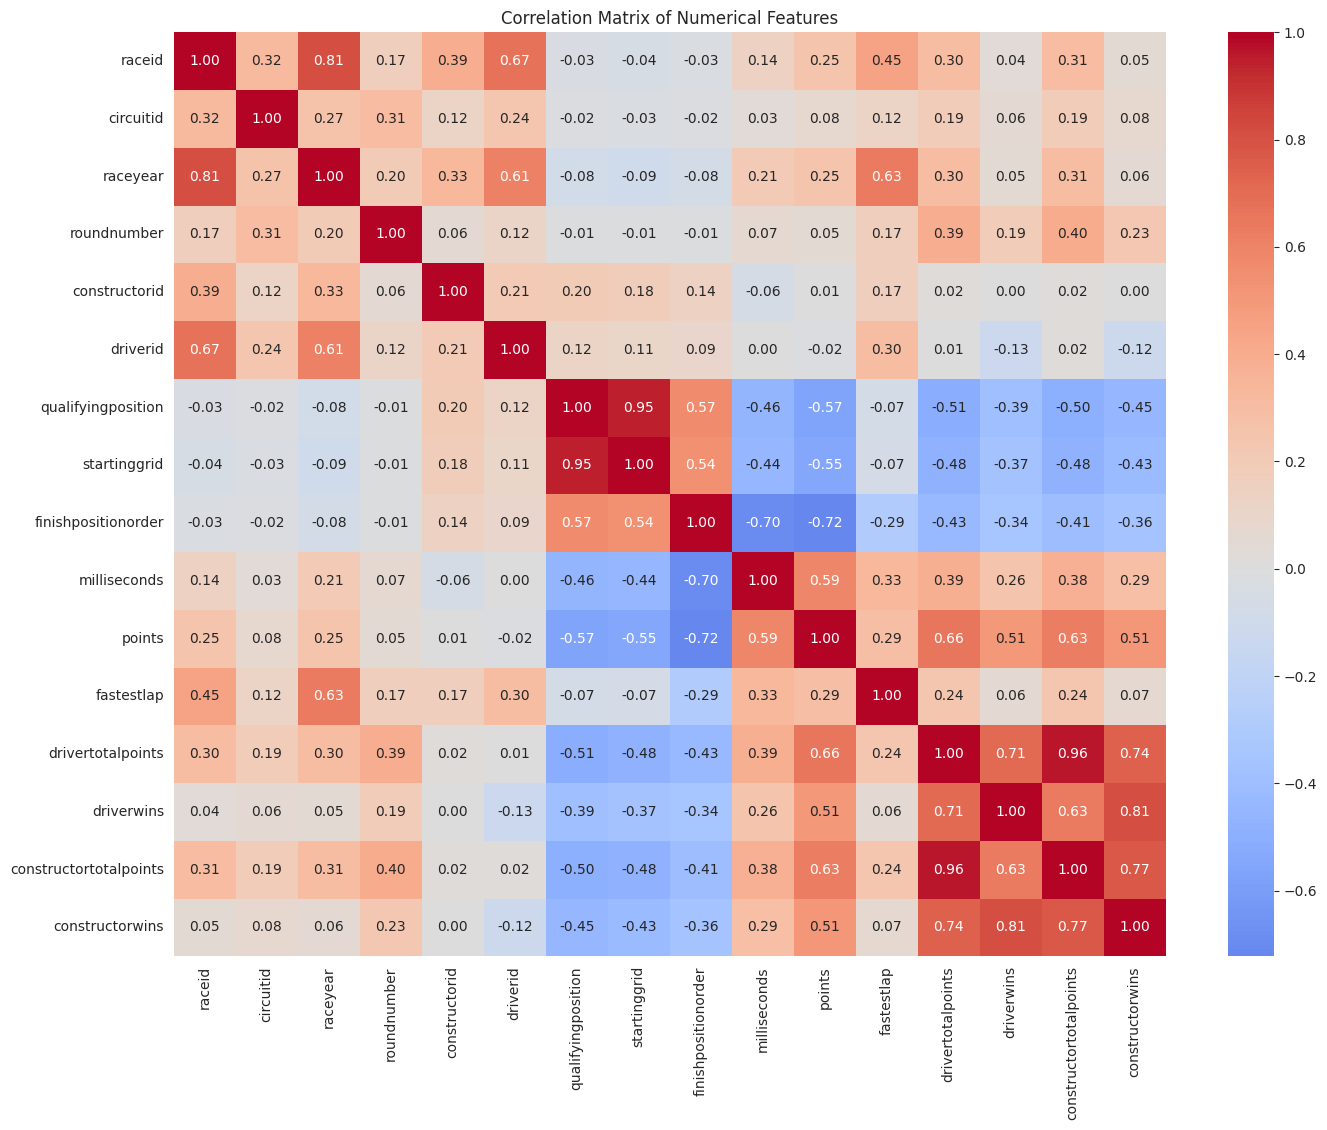

In [11]:
# Select numerical columns for correlation
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[num_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Outlier Detection

In [12]:
# Z-score analysis for numerical columns
z_scores = stats.zscore(df[num_cols])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).sum(axis=0)

# Create Series with column names as index
outliers_series = pd.Series(outliers, index=num_cols)

print("Number of outliers (z-score > 3) per column:")
print(outliers_series.sort_values(ascending=False))

Number of outliers (z-score > 3) per column:
constructorwins           308
constructortotalpoints    278
driverwins                276
drivertotalpoints         274
points                    260
circuitid                  80
milliseconds               12
raceid                      0
startinggrid                0
qualifyingposition          0
driverid                    0
constructorid               0
roundnumber                 0
raceyear                    0
fastestlap                  0
finishpositionorder         0
dtype: int64


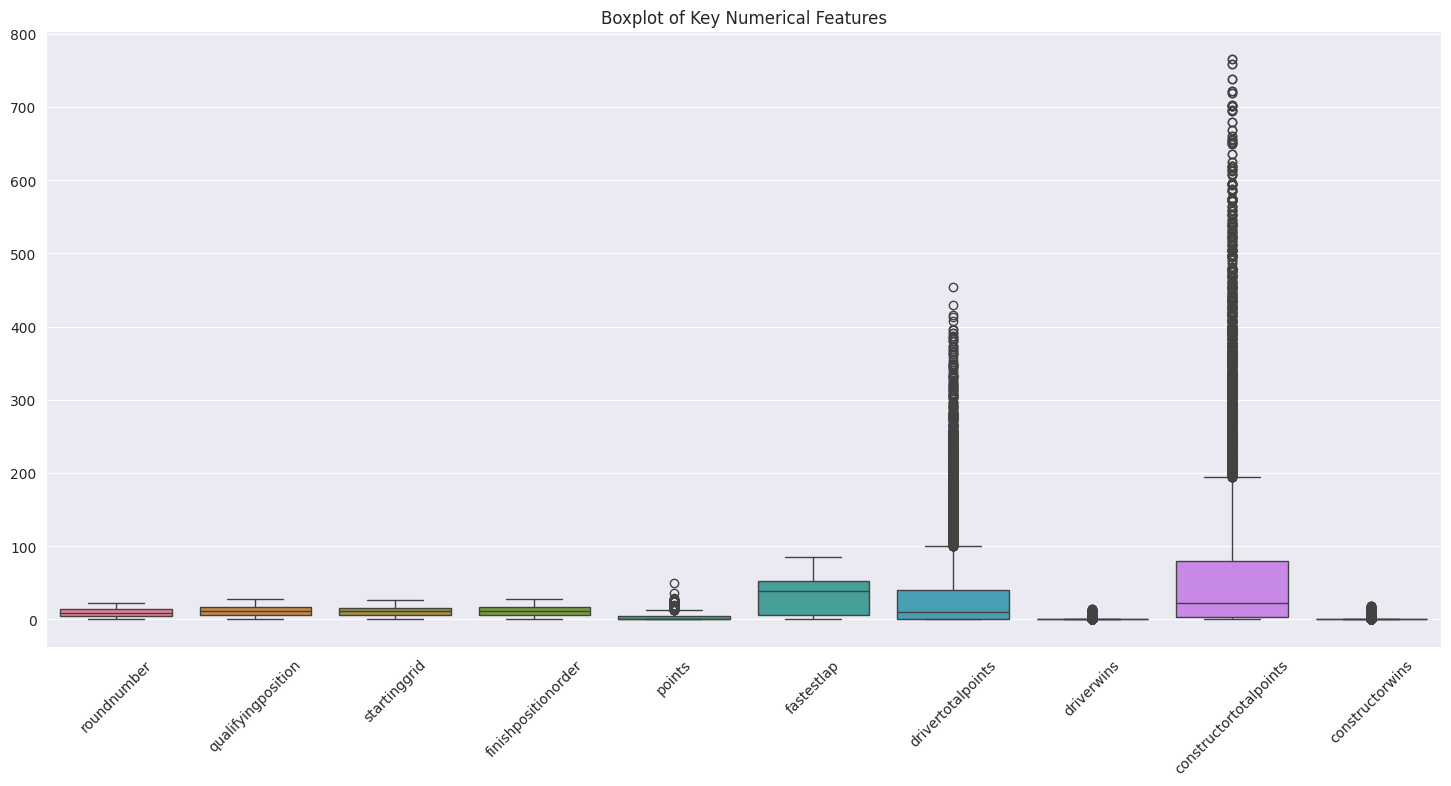

In [13]:
# Boxplot for key numerical features
plt.figure(figsize=(18, 8))
sns.boxplot(data=df[['roundnumber', 'qualifyingposition', 'startinggrid','finishpositionorder', 'points', 'fastestlap', 'drivertotalpoints', 'driverwins', 'constructortotalpoints', 'constructorwins']])
plt.title('Boxplot of Key Numerical Features')
plt.xticks(rotation=45)
plt.show()

## Deeper Analysis

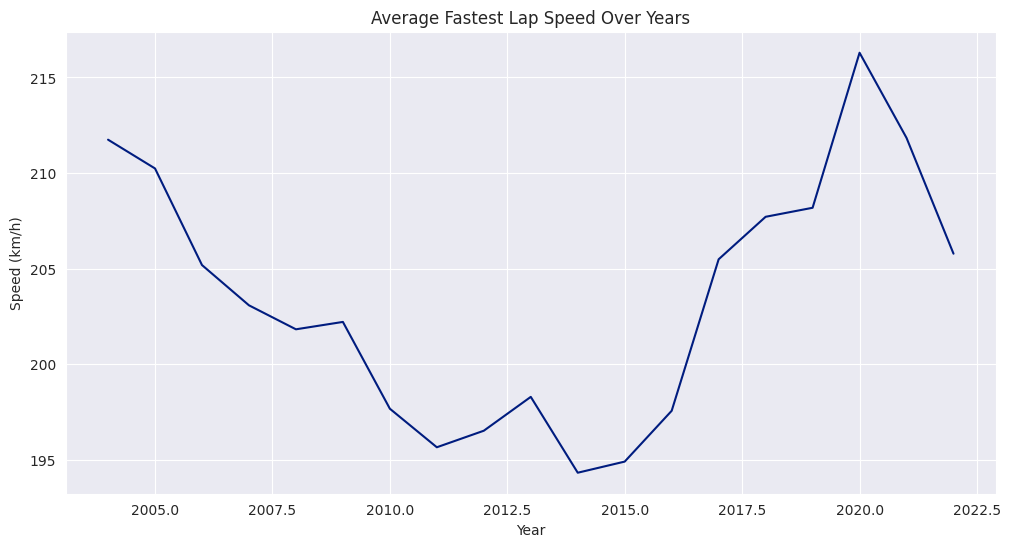

In [14]:
# Time series analysis of average lap speed by year
df['fastestlapspeed'] = pd.to_numeric(df['fastestlapspeed'], errors='coerce')
plt.figure(figsize=(12, 6))
df[df['fastestlapspeed'] > 0].groupby('raceyear')['fastestlapspeed'].mean().plot()
plt.title('Average Fastest Lap Speed Over Years')
plt.xlabel('Year')
plt.ylabel('Speed (km/h)')
plt.grid(True)
plt.show()

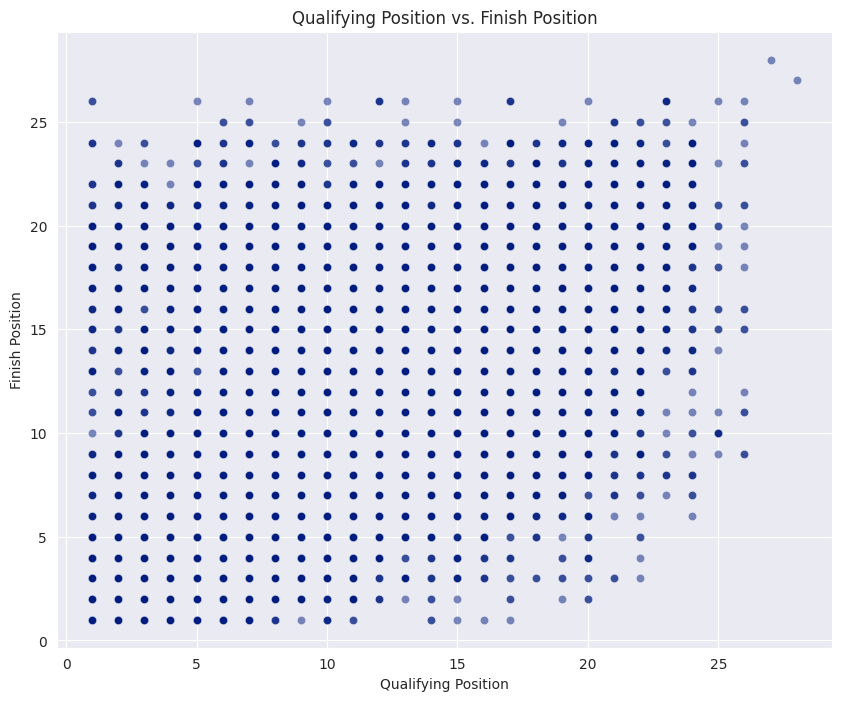

In [15]:
# Relationship between qualifying position and finish position
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='qualifyingposition', y='finishpositionorder', alpha=0.5)
plt.title('Qualifying Position vs. Finish Position')
plt.xlabel('Qualifying Position')
plt.ylabel('Finish Position')
plt.show()

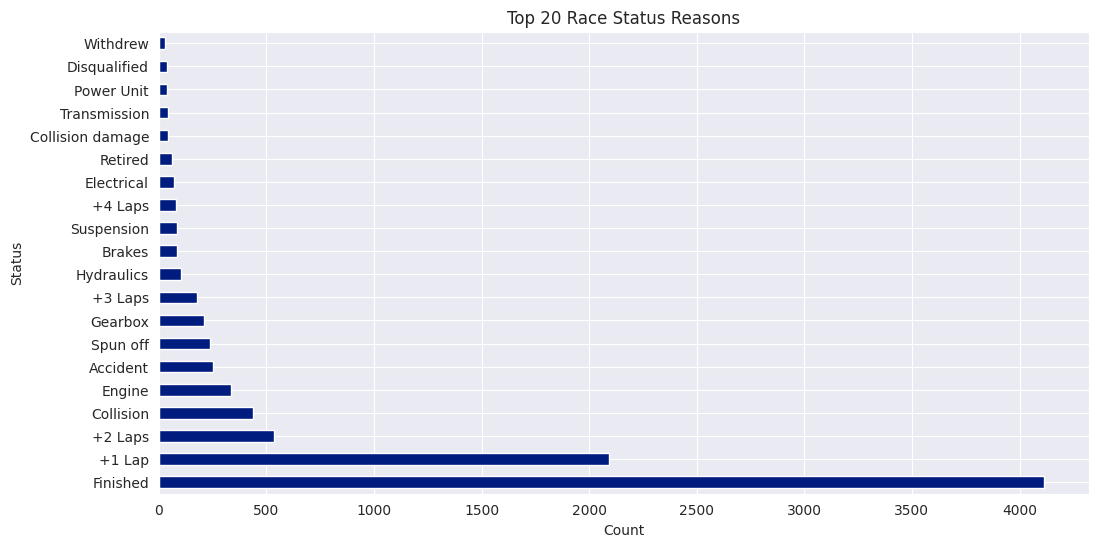

In [16]:
# Distribution of status (why races ended)
plt.figure(figsize=(12, 6))
df['status'].value_counts().head(20).plot(kind='barh')
plt.title('Top 20 Race Status Reasons')
plt.xlabel('Count')
plt.ylabel('Status')
plt.show()

## Driver & Constructor Analysis

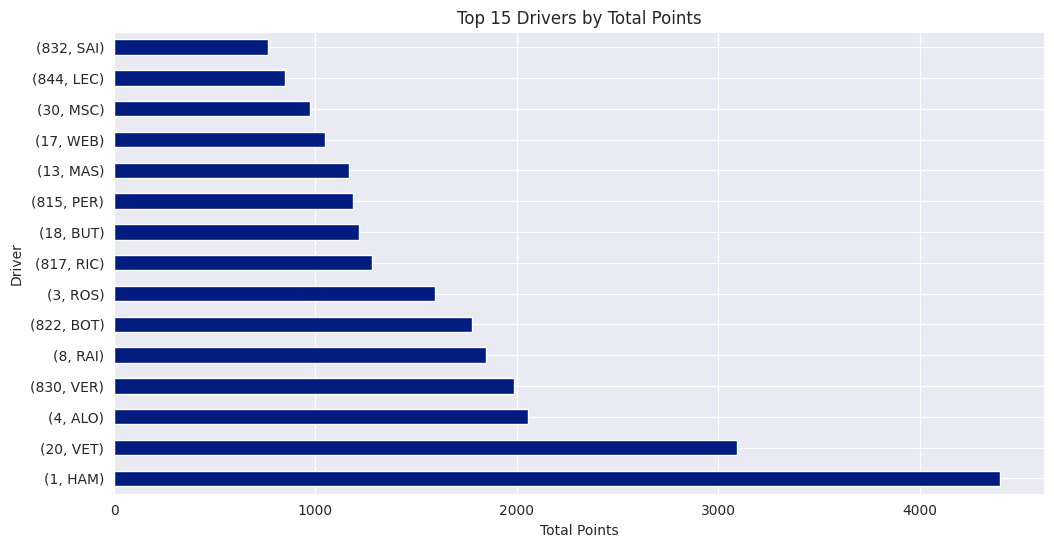

In [17]:
# Top drivers by points
top_drivers = df.groupby(['driverid', 'drivercode'])['points'].sum().nlargest(15)
plt.figure(figsize=(12, 6))
top_drivers.plot(kind='barh')
plt.title('Top 15 Drivers by Total Points')
plt.xlabel('Total Points')
plt.ylabel('Driver')
plt.show()

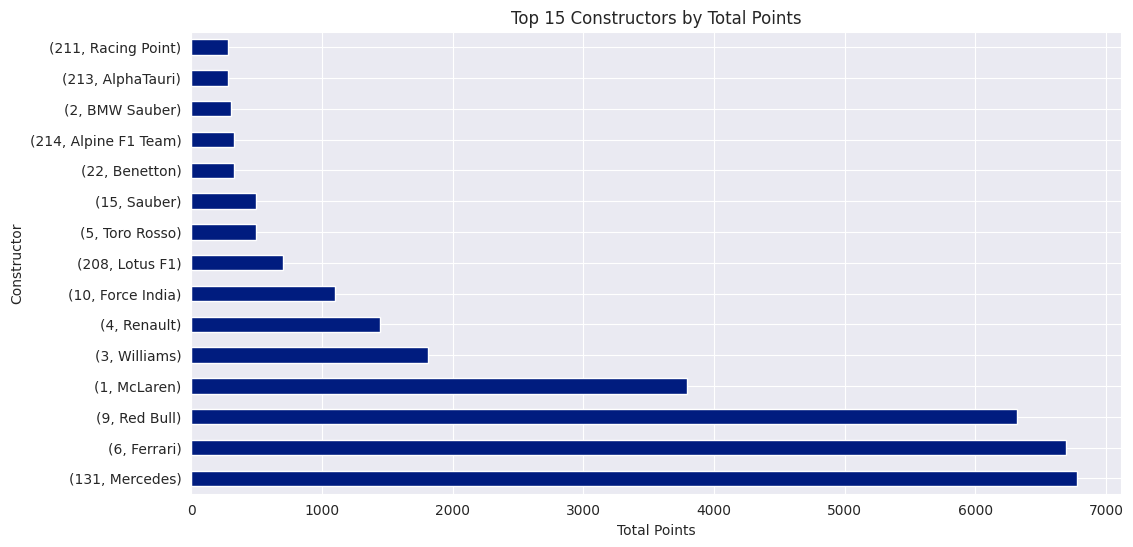

In [18]:
# Top constructors by points
top_constructors = df.groupby(['constructorid', 'constructorname'])['points'].sum().nlargest(15)
plt.figure(figsize=(12, 6))
top_constructors.plot(kind='barh')
plt.title('Top 15 Constructors by Total Points')
plt.xlabel('Total Points')
plt.ylabel('Constructor')
plt.show()

## Initial Feature Engineering

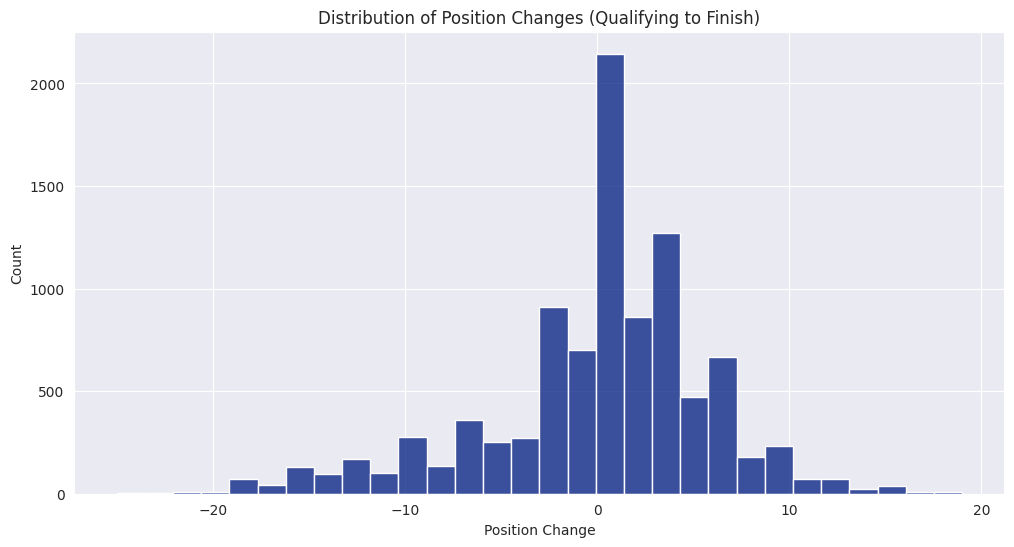

In [19]:
# Example of feature engineering - calculate position change from qualifying to finish
df['position_change'] = df['qualifyingposition'] - df['finishpositionorder']

# Analyze position changes
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='position_change', bins=30)
plt.title('Distribution of Position Changes (Qualifying to Finish)')
plt.xlabel('Position Change')
plt.ylabel('Count')
plt.show()

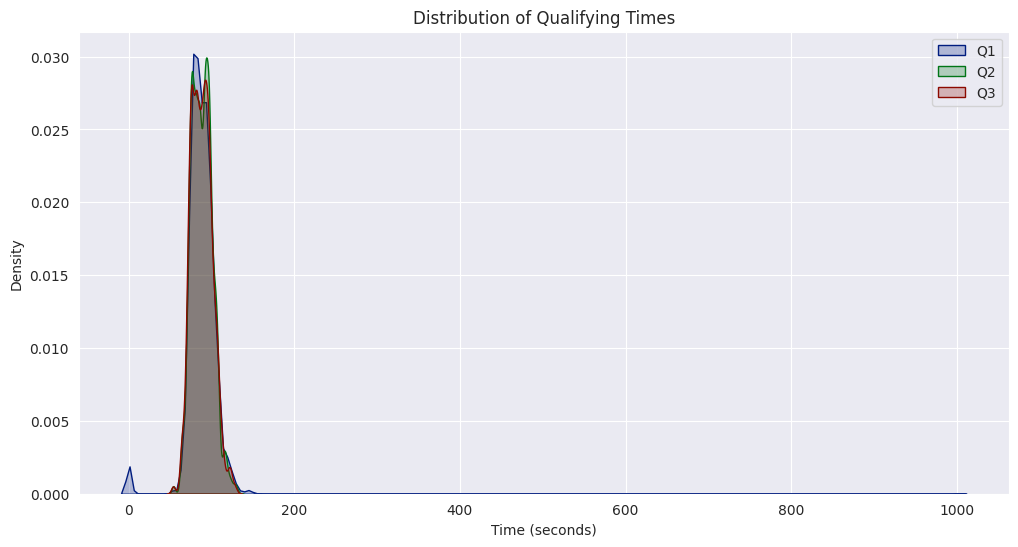

In [20]:
# Example of time delta analysis (for future development)
# Convert qualifying times to seconds for comparison
def convert_to_seconds(time_str):
    try:
        minutes, seconds = time_str.split(':')
        return float(minutes) * 60 + float(seconds)
    except:
        return 0

if 'q1' in df.columns:
    df['q1_seconds'] = df['q1'].apply(convert_to_seconds)
    df['q2_seconds'] = df['q2'].apply(convert_to_seconds)
    df['q3_seconds'] = df['q3'].apply(convert_to_seconds)

    # Plot qualifying time distributions
    plt.figure(figsize=(12, 6))
    sns.kdeplot(data=df, x='q1_seconds', label='Q1', fill=True)
    sns.kdeplot(data=df[df['q2_seconds'] > 0], x='q2_seconds', label='Q2', fill=True)
    sns.kdeplot(data=df[df['q3_seconds'] > 0], x='q3_seconds', label='Q3', fill=True)
    plt.title('Distribution of Qualifying Times')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

## Summary Statistics

In [21]:
# Final summary of cleaned data
print("Final Data Shape:", df.shape)
print("\nData Types After Cleaning:")
print(df.dtypes)

# Show remaining nulls if any
print("\nRemaining Null Values:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Final Data Shape: (9575, 35)

Data Types After Cleaning:
raceid                      int64
circuitid                   int64
circuitname                object
raceyear                    int64
racedate                   object
racetime                   object
roundnumber                 int64
raceurl                    object
constructorid               int64
constructorname            object
driverid                    int64
drivercode                 object
q1                         object
q2                         object
q3                         object
qualifyingposition          int64
startinggrid                int64
finishpositionorder         int64
finishpositiontext         object
status                     object
milliseconds              float64
points                    float64
fastestlap                float64
fastestlaptime             object
fastestlapspeed           float64
drivertotalpoints         float64
driverrank                 object
driverwins               

In [22]:
df

,raceid,circuitid,circuitname,raceyear,racedate,racetime,roundnumber,raceurl,constructorid,constructorname,driverid,drivercode,q1,q2,q3,qualifyingposition,startinggrid,finishpositionorder,finishpositiontext,status,milliseconds,points,fastestlap,fastestlaptime,fastestlapspeed,drivertotalpoints,driverrank,driverwins,constructortotalpoints,constructorrank,constructorwins,position_change,q1_seconds,q2_seconds,q3_seconds
0,257,18,Autódromo José Carlos Pace,1994,1994-03-27,0,1,http://en.wikipedia.org/wiki/1994_Brazilian_Gr...,22,Benetton,30,MSC,1:16.290,0,0,2,2,1,1,Finished,5739200.0,10.0,0.0,0,0.000,10.0,1,1.0,10.0,1,1.0,1,76.290,0.000,0.000
1,257,18,Autódromo José Carlos Pace,1994,1994-03-27,0,1,http://en.wikipedia.org/wiki/1994_Brazilian_Gr...,3,Williams,71,_UNK,1:17.554,0,0,4,4,2,2,+1 Lap,0.0,6.0,0.0,0,0.000,6.0,2,0.0,6.0,2,0.0,2,77.554,0.000,0.000
2,257,18,Autódromo José Carlos Pace,1994,1994-03-27,0,1,http://en.wikipedia.org/wiki/1994_Brazilian_Gr...,6,Ferrari,55,_UNK,1:17.385,0,0,3,3,3,3,+1 Lap,0.0,4.0,0.0,0,0.000,4.0,3,0.0,4.0,3,0.0,0,77.385,0.000,0.000
3,257,18,Autódromo José Carlos Pace,1994,1994-03-27,0,1,http://en.wikipedia.org/wiki/1994_Brazilian_Gr...,17,Jordan,22,BAR,1:18.414,0,0,14,14,4,4,+1 Lap,0.0,3.0,0.0,0,0.000,3.0,4,0.0,3.0,4,0.0,10,78.414,0.000,0.000
4,257,18,Autódromo José Carlos Pace,1994,1994-03-27,0,1,http://en.wikipedia.org/wiki/1994_Brazilian_Gr...,25,Tyrrell,79,_UNK,1:18.194,0,0,10,10,5,5,+2 Laps,0.0,2.0,0.0,0,0.000,2.0,5,0.0,2.0,5,0.0,5,78.194,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9570,1096,24,Yas Marina Circuit,2022,2022-11-20,13:00:00,22,http://en.wikipedia.org/wiki/2022_Abu_Dhabi_Gr...,210,Haas F1 Team,854,MSC,1:25.711,1:25.225,0,13,12,16,16,+1 Lap,0.0,0.0,39.0,1:29.833,211.632,12.0,16,0.0,37.0,8,0.0,-3,85.711,85.225,0.000
9571,1096,24,Yas Marina Circuit,2022,2022-11-20,13:00:00,22,http://en.wikipedia.org/wiki/2022_Abu_Dhabi_Gr...,210,Haas F1 Team,825,MAG,1:25.834,0,0,16,16,17,17,+1 Lap,0.0,0.0,40.0,1:31.158,208.556,25.0,13,0.0,37.0,8,0.0,-1,85.834,0.000,0.000
9572,1096,24,Yas Marina Circuit,2022,2022-11-20,13:00:00,22,http://en.wikipedia.org/wiki/2022_Abu_Dhabi_Gr...,131,Mercedes,1,HAM,1:25.594,1:24.774,1:24.508,5,5,18,18,Hydraulics,0.0,0.0,42.0,1:29.788,211.738,240.0,6,0.0,515.0,3,1.0,-13,85.594,84.774,84.508
9573,1096,24,Yas Marina Circuit,2022,2022-11-20,13:00:00,22,http://en.wikipedia.org/wiki/2022_Abu_Dhabi_Gr...,3,Williams,849,LAT,1:26.054,0,0,20,20,19,19,Collision damage,0.0,0.0,45.0,1:30.309,210.517,2.0,20,0.0,8.0,10,0.0,1,86.054,0.000,0.000
